<a href="https://colab.research.google.com/github/WWCode-SV/Introduction_to_ML_worskshop/blob/master/NY_Taxi_Fare_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Problem Description
- We are asked to predict the amount of fare for a taxi ride in New York City given :
  - Pickup and Dropoff locations
  - Number of passengers in a ride
  - Pickup date time for a ride
- So fare amount is our target variable and rest of the variables are our predictor variables. Hence, its a supervised regression problem
- In this notebook we will build a regression model to solve this using Linear Regression model from scikit learn library

## Table of contents
1. Data Loading
2. Data Exploration
3. Univariate Analysis and Outlier Treatment
4. Bivariate Analysis
5. Preprocessing
5. Linear Regression Fitting
6. Cost Function
7. Optimization Visualization
8. Feature Engineering 
9. Regularization

### 1. Data Loading

In [2]:
#importing required packages
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
plt.style.use('bmh')
sns.set_style({'axes.grid':False})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#reading csv file into pandas dataframe
data = pd.read_csv('/content/gdrive/My Drive/ColabNotebooks/NYTaxiFarePrediction/Data/train.csv')

> Note : We will do the train test split after preprocessing and feature engineering so that the changes are consistent in both train and test dataset


### 2. Data Exploration
  - Investigating the number of features, their datatype, their meaning and statistics.

In [4]:
#list first five rows
print('Preview data:')
display(data.head())

Preview data:


,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844315,40.721317,-73.84161,40.712276,1
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016045,40.711304,-73.97927,40.782005,1
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982735,40.761270,-73.99124,40.750560,2
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.99157,40.758090,1
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968094,40.768010,-73.95666,40.783764,1


In [5]:
# check datatypes
print('Check datatypes:')
display(data.dtypes)

Check datatypes:


Unnamed: 0             int64
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [0]:
#pickup_datetime is in object datatype so let's convert it to datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], infer_datetime_format=True)

In [7]:
# check datatypes after converting
print('Check datatypes:')
display(data.dtypes)

Check datatypes:


Unnamed: 0                    int64
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [8]:
# check statistics of the features
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,2.500000e+06,1.134080e+01,-7.250678e+01,3.991974e+01,-7.250652e+01,3.991725e+01,1.684695e+00
std,1.443376e+06,9.820175e+00,1.280970e+01,8.963509e+00,1.284777e+01,9.486767e+00,1.331854e+00
min,0.000000e+00,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,1.250000e+06,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,2.500000e+06,8.500000e+00,-7.398181e+01,4.075264e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,3.749999e+06,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,4.999999e+06,1.273310e+03,3.439425e+03,3.310365e+03,3.457622e+03,3.345917e+03,2.080000e+02




> - One interesting observation from the statistics, we can see is that there are fare amount less than zero.
> - Since this is not possible, these are mistakes in data collection and hence considered outliers which skew the distribution.
> - We will address that in next section.



### 3. Univariate Analysis and Outlier Treatment



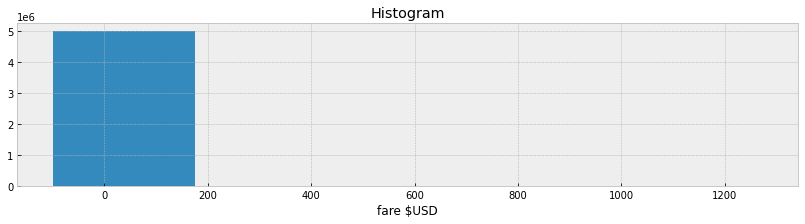

In [9]:
# plot histogram of fare
data.fare_amount.hist(bins=5, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

In [10]:
# we remove these outliers from our dataset
print('Old size: %d' % len(data))
data = data[data.fare_amount>=0]
print('New size: %d' % len(data))

Old size: 5000000
New size: 4999789


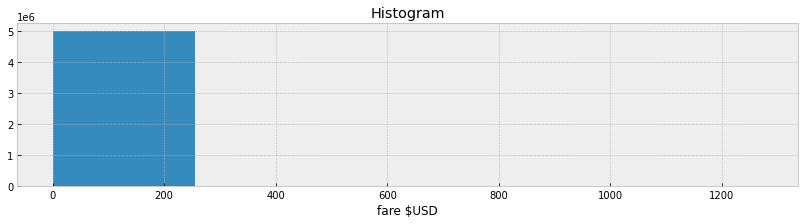

In [11]:
# plot histogram of fare
data.fare_amount.hist(bins=5, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

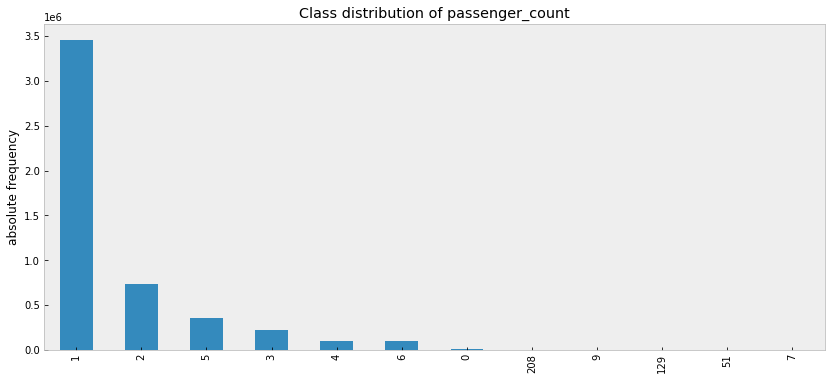

In [12]:
# Class distribution of passenger_count
fig, ax = plt.subplots(figsize = (14,6))
class_dist = data.passenger_count.value_counts()
class_dist.plot(kind = 'bar', ax = ax)
ax.set_title('Class distribution of passenger_count')
ax.set_ylabel('absolute frequency')
plt.show()



> Classes like 208, 129, and 51 turn out to be outliers, since it is not psiible for a taxi to carry. These instances should be removed.



In [0]:
passenger_count_to_drop = data.loc[(data.passenger_count==208) | (data.passenger_count==129) | (data.passenger_count==9) | (data.passenger_count==51) | 
                                   (data.passenger_count==0)].index
data.drop(passenger_count_to_drop, axis = 0, inplace = True)

In [14]:
# we remove these outliers from our dataset
print('Old size: %d' % len(data))
data = data[data.fare_amount>=0]
print('New size: %d' % len(data))

Old size: 4982140
New size: 4982140


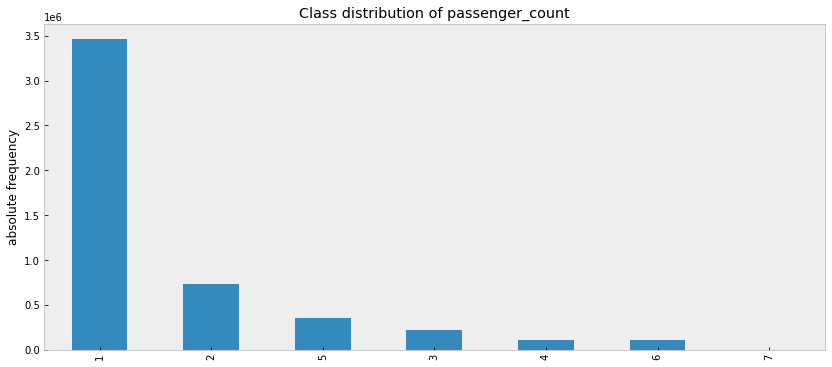

In [15]:
# Class distribution of passenger_count
fig, ax = plt.subplots(figsize = (14,6))
class_dist = data.passenger_count.value_counts()
class_dist.plot(kind = 'bar', ax = ax)
ax.set_title('Class distribution of passenger_count')
ax.set_ylabel('absolute frequency')
plt.show()



> - So as we can see performing univariate analysis helps us detect  and remove outliers in our dataset.
> - You can deduce other conclusions by exploring dataset.



### 8. Feature Engineering

In [0]:
# Convert lons and lats into cartesian coordinates. Assume the earth as sphere not ellipsoid
R = 6371000 # Approximate mean radius of earth (in m)
 # lons and lats must be in radians
lon1,lat1,lon2,lat2 = map(np.radians, [data.pickup_longitude, data.pickup_latitude, data.dropoff_longitude, data.dropoff_latitude])

data['pickup_x'] = R*np.cos(lon1)*np.cos(lat1)
data['pickup_y'] = R*np.sin(lon1)*np.cos(lat1)
data['dropoff_x'] = R*np.cos(lon2)*np.cos(lat2)
data['dropoff_y'] = R*np.sin(lon2)*np.cos(lat2)

# Now calculate the euclidean distance
x1 = data['pickup_x']
y1 = data['pickup_y']
x2 = data['dropoff_x']
y2 = data['dropoff_y']
data['euclidean_distance'] = (np.sqrt(( x1 - x2)**2 + ( y1 - y2)**2))/1000 # in km

In [0]:
# Create two variables taking absolute differences of lons and lats
data['abs_lon_diff'] = np.abs(data.pickup_longitude - data.dropoff_longitude)
data['abs_lat_diff'] = np.abs(data.pickup_latitude - data.dropoff_latitude)

In [0]:
# Extract pickup_hour, day, date, month, and year from pickup_datetime and then drop the field as the format is not supported
data['pickup_hour'] = data.pickup_datetime.dt.hour
data['pickup_date'] =  data.pickup_datetime.dt.day
data['pickup_day_of_week'] =  data.pickup_datetime.dt.dayofweek
data['pickup_month'] =  data.pickup_datetime.dt.month
data['pickup_year'] =  data.pickup_datetime.dt.year
data.drop(['pickup_datetime'], axis = 1, inplace = True)

### Model Building 

In [0]:
# split data into train test set into train and test in 70:30 ratio
y = data["fare_amount"]
X = data.drop(["fare_amount"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [20]:
X_train.dtypes

Unnamed: 0              int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count         int64
pickup_x              float64
pickup_y              float64
dropoff_x             float64
dropoff_y             float64
euclidean_distance    float64
abs_lon_diff          float64
abs_lat_diff          float64
pickup_hour             int64
pickup_date             int64
pickup_day_of_week      int64
pickup_month            int64
pickup_year             int64
dtype: object

In [21]:
y_train.dtypes

dtype('float64')

In [0]:
# Train and predict using linear regression

linear_reg = LinearRegression()

# Train with the objt
linear_reg.fit(X_train, y_train)

# Make prediction
y_pred = linear_reg.predict(X_test)

### Cost Funtion
- To evaluate performnace of the model and optimize it
- We apply different Loss Functions as learned and compare.

#### Mean Squared Error

In [23]:
mean_squared_error(y_test, y_pred)

96.45338376786233

#### Root Mean Squared Error

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

9.82106836183632